# Thiết kế 2: Sử dụng Inheritance

Đây là 1 trong 3 phần của bài thực hành về những phong cách viết code khác nhau trong Python, phần này minh họa về cách thiết kế OOP sử dụng hoàn toàn Inheritance (quan hệ kế thừa giữa 2 class); 2 phần kia trình bày về cách tiếp cận chỉ dùng hàm, và OOP Composition, có thể tải tại đây:

https://github.com/kinokoberuji/Python-snipets/tree/master/GOF/Designs


# Mục tiêu

Nhắc lại về tình huống hiện thời: Chúng ta có 3 file pickles chứa dữ liệu thô của xét nghiệm đa ký hô hấp (PG) (BN_C_Polygraph.pkl), một cảm biến hô hấp mới dùng công nghệ Accelerometer (BN_C_Sensor.pkl), và danh sách các biến cố ngưng/giảm thở khi ngủ (BN_C_Scoring.pkl) của bệnh nhân C.

Mục tiêu là viết 1 chương trình cho phép hiển thị các tín hiệu PG và Acc cho một biến cố hô hấp tùy chọn trong danh sách, với yêu cầu:

1) Nếu là tín hiệu PG, hiển thị 3 kênh RIP thorax, Abdominal và lưu lượng thông khí qua mũi (flux th).

2) Nếu là tín hiệu Acc, cần xác định thêm giới hạn trên và dưới của biên độ dao động 3 kênh X,Y,Z của cảm biến.

# Sơ đồ UML

Phần này, Nhi code theo OOP, và chỉ dùng thiết kế Inheritance. Sơ đồ UML là như sau:

<img src="files/inheritance_uml.png">

Nội dung chi tiết của code nằm trong module Composition.py :
https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Designs/Inheritance.py

Ta sử dụng module này như sau:

In [3]:
from Inheritance import *

Như các bạn thấy trong sơ đồ UML, Nhi sử dụng 2 class riêng biệt là PG_visual và Acc_Visual để thực hiện công việc vẽ biểu đồ cho 2 loại tín hiệu theo yêu cầu khác nhau. Nhi dùng liên hệ Inheritance để cho subclass PG_visual kế thừa tất cả nội dung từ class PG_data, tương tự class Acc_visual là subclass  của Acc_data.

PG_data và Acc_data là 2 concrete class của Abstract class (class mẫu) Data_pack. Chúng tải dữ liệu và danh sách biến cố, riêng class Acc_data thực hiện thêm phân tích về biên độ dao động. 

Khi sử dụng, ta chỉ cần khởi tạo 1 object cho mỗi class, thí dụ PG_Visual cho trường hợp tín hiệu Polygraphy, với các thông tin về đường dẫn 2 files signal và events, và vị trí idx, sau đó ta gọi method visualize_signal() và mọi thứ sẽ được thi hành:

In [15]:
pg_viz = PG_Visual(sig_path = 'BN_C_Polygraph.pkl', 
                   evt_path = 'BN_C_Scoring.pkl',
                   idx = 53)

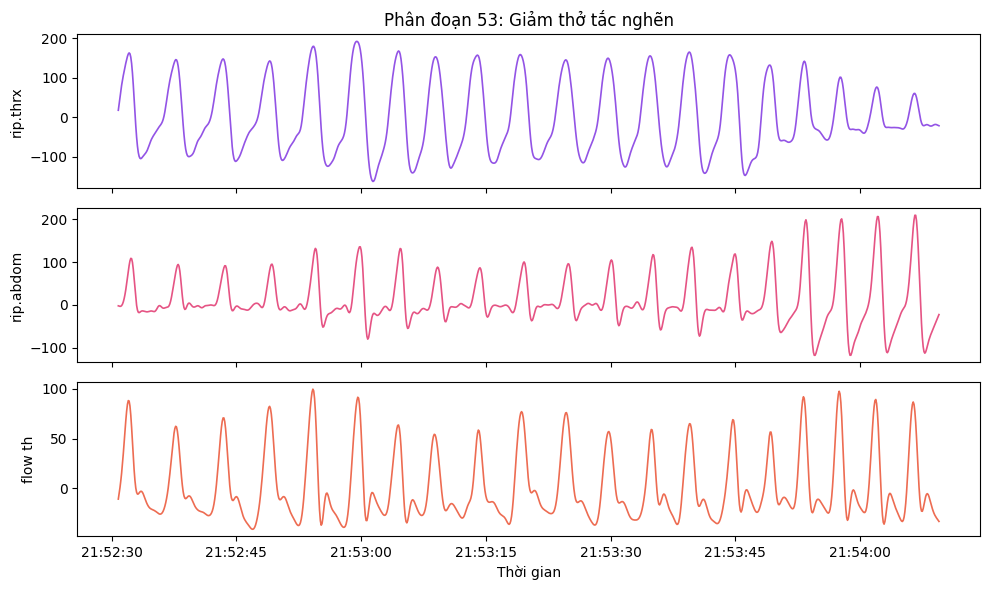

In [16]:
pg_viz.visualize_signal()

Đây là minh họa cho trường hợp dữ liệu là Accelerometer, ta làm tương tự bằng class Acc_Visual

In [17]:
acc_viz = Acc_Visual(sig_path = 'BN_C_Sensor.pkl', 
                   evt_path = 'BN_C_Scoring.pkl',
                   idx = 53)

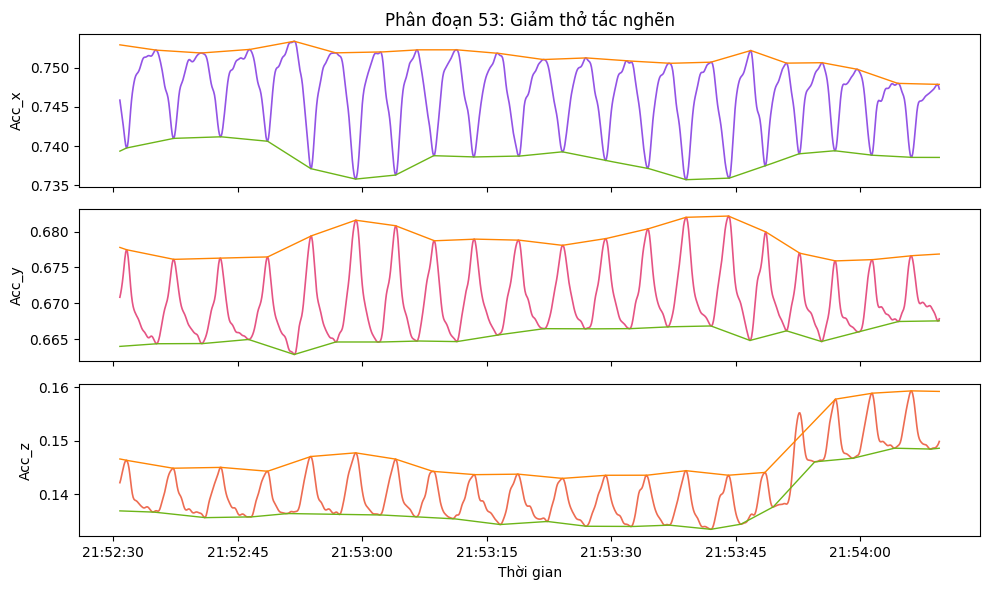

In [18]:
acc_viz.visualize_signal()